In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import mlflow
import mlflow.sklearn

In [3]:
import mlflow

# End any stuck runs
if mlflow.active_run():
    mlflow.end_run()

#### Loading the dataset

In [4]:
df_survey = pd.read_csv('survey_results.csv')
df_survey.head(3)

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250


In [112]:
df_survey['price_range'].unique()

array(['100-150', '200-250', '150-200', '50-100'], dtype=object)

In [5]:
df_survey.shape

(30010, 17)

In [6]:
df_survey.duplicated().sum()

10

In [7]:
df_survey = df_survey.drop_duplicates()
df_survey.shape

(30000, 17)

In [8]:
df_survey.age.describe()

count    30000.000000
mean        33.048167
std         13.438904
min         18.000000
25%         23.000000
50%         31.000000
75%         40.000000
max        604.000000
Name: age, dtype: float64

#### Outlier Detection in Age

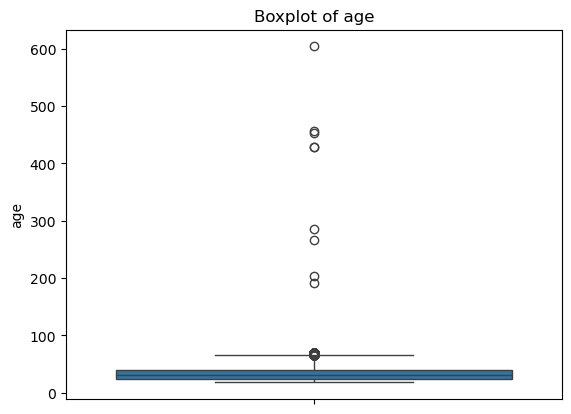

In [9]:
sns.boxplot(df_survey.age)
plt.title('Boxplot of age')
plt.show()

We have many outliers outside the range of 100.

In [118]:
# Q1, Q3 = df_survey.age.quantile([0.25, 0.75])
# IQR = Q3 - Q1
# IQR

# # To get the range of age and remove outliers, we will figure the lower bound and upper bound for the age
# lower_limit = Q1 - (1.5 * IQR)
# upper_limit = Q3 + (1.5 * IQR)
# print(lower_limit, upper_limit)

# #Since -2.5 cannot be the age and the minimum age we have is 18, we will filter out data based on upper bound

# df_survey1 = df_survey[(df_survey.age <= 65) & (df_survey.age > 0)]


#df_survey1 = df_survey[df_survey.age <= 100]
df_survey1.shape

(29991, 17)

#### Handling Missing values in income column

In [11]:
df_survey1.head(5)

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,NaN,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


In [12]:
df_survey1.income_levels.isna().sum()

8060

In [13]:
df_survey1['income_levels'] = df_survey1['income_levels'].fillna('Not Reported')

C:\Users\aksha\AppData\Local\Temp\ipykernel_31456\3948694397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survey1['income_levels'] = df_survey1['income_levels'].fillna('Not Reported')


In [14]:
df_survey1.isna().sum()

respondent_id                      0
age                                0
gender                             0
zone                               0
occupation                         0
income_levels                      0
consume_frequency(weekly)          8
current_brand                      0
preferable_consumption_size        0
awareness_of_other_brands          0
reasons_for_choosing_brands        0
flavor_preference                  0
purchase_channel                  10
packaging_preference               0
health_concerns                    0
typical_consumption_situations     0
price_range                        0
dtype: int64

In [15]:
df_survey1['consume_frequency(weekly)'].isna().sum()

8

In [16]:
df_survey1.fillna(df_survey1['consume_frequency(weekly)'].mode()[0], inplace= True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_31456\2420416593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survey1.fillna(df_survey1['consume_frequency(weekly)'].mode()[0], inplace= True)


In [17]:
df_survey1.isna().sum()

respondent_id                     0
age                               0
gender                            0
zone                              0
occupation                        0
income_levels                     0
consume_frequency(weekly)         0
current_brand                     0
preferable_consumption_size       0
awareness_of_other_brands         0
reasons_for_choosing_brands       0
flavor_preference                 0
purchase_channel                  0
packaging_preference              0
health_concerns                   0
typical_consumption_situations    0
price_range                       0
dtype: int64

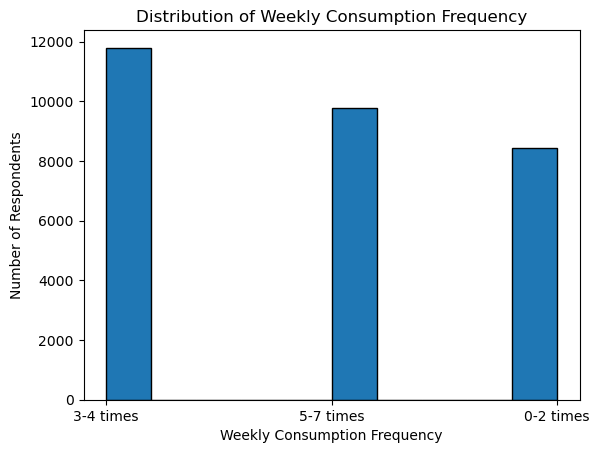

In [18]:
# Drop NaN values before plotting
plt.hist(df_survey1['consume_frequency(weekly)'], edgecolor='black')
plt.xlabel('Weekly Consumption Frequency')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Weekly Consumption Frequency')
plt.show()

In [19]:
df_survey1.isna().sum()

respondent_id                     0
age                               0
gender                            0
zone                              0
occupation                        0
income_levels                     0
consume_frequency(weekly)         0
current_brand                     0
preferable_consumption_size       0
awareness_of_other_brands         0
reasons_for_choosing_brands       0
flavor_preference                 0
purchase_channel                  0
packaging_preference              0
health_concerns                   0
typical_consumption_situations    0
price_range                       0
dtype: int64

#### Correcting Spelling mistakes in categorical columns

In [20]:
df_survey1.zone.unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban', 'Metor', 'urbna'],
      dtype=object)

In [21]:
df_survey1[df_survey1.zone == 'Metor'].shape

(4, 17)

In [22]:
df_survey1.replace('urbna', 'Urban', inplace= True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_31456\661690687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survey1.replace('urbna', 'Urban', inplace= True)


In [23]:
df_survey1.zone.unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban', 'Metor'], dtype=object)

In [24]:
df_survey1.replace('Metor', 'Metro', inplace= True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_31456\3805800883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survey1.replace('Metor', 'Metro', inplace= True)


In [25]:
df_survey1.zone.unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban'], dtype=object)

In [26]:
df_survey1.current_brand.unique()

array(['Newcomer', 'Established', 'newcomer', 'Establishd'], dtype=object)

In [27]:
df_survey1.current_brand.replace('newcomer', 'Newcomer', inplace = True)
df_survey1.current_brand.replace('Establishd', 'Established', inplace = True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_31456\1832727628.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_survey1.current_brand.replace('newcomer', 'Newcomer', inplace = True)
C:\Users\aksha\AppData\Local\Temp\ipykernel_31456\1832727628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survey1.current_brand.replace('newcomer', '

In [28]:
df_survey1.current_brand.unique()

array(['Newcomer', 'Established'], dtype=object)

### Feature Engineering

#### Categorize Age into Age Groups

In [29]:
def categorize_age(age):
    if (age>=18 and age<=25):
        return '18-25'
    elif (age>25 and age<=35):
        return '26-35'
    elif (age>35 and age<=45):   
        return '36-45'
    elif (age>45 and age<=55): 
        return '46-55'
    elif (age>55 and age<=70): 
        return '56-70'
    elif (age > 70):
        return '70+'

df_survey1['age-group'] = df_survey1.age.map(categorize_age)
df_survey1.head(5)



C:\Users\aksha\AppData\Local\Temp\ipykernel_31456\1203188547.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survey1['age-group'] = df_survey1.age.map(categorize_age)


,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age-group
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35
4,R00005,23,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25


In [30]:
df_survey1.drop('age', axis= 1, inplace= True)
df_survey1.head(1)

C:\Users\aksha\AppData\Local\Temp\ipykernel_31456\1681943932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survey1.drop('age', axis= 1, inplace= True)


,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age-group
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35


#### Create `cf_ab_score` (Consume Frequency and Awareness Brand Score)

In [31]:
df_survey1.isna().sum()

respondent_id                     0
gender                            0
zone                              0
occupation                        0
income_levels                     0
consume_frequency(weekly)         0
current_brand                     0
preferable_consumption_size       0
awareness_of_other_brands         0
reasons_for_choosing_brands       0
flavor_preference                 0
purchase_channel                  0
packaging_preference              0
health_concerns                   0
typical_consumption_situations    0
price_range                       0
age-group                         0
dtype: int64

In [32]:
df_survey1['consume_frequency(weekly)'] = df_survey1['consume_frequency(weekly)'].map({
     "0-2 times" :1,
     "3-4 times" :2,
     "5-7 times" :3
})

C:\Users\aksha\AppData\Local\Temp\ipykernel_31456\4132829870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survey1['consume_frequency(weekly)'] = df_survey1['consume_frequency(weekly)'].map({


In [33]:
df_survey1.head(1)

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age-group
0,R00001,M,Urban,Working Professional,<10L,2,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35


In [34]:
df_survey1['awareness_of_other_brands'] =  df_survey1['awareness_of_other_brands'].map({
     "0 to 1" : 1,
     "2 to 4" : 2,
     "above 4" : 3
})

C:\Users\aksha\AppData\Local\Temp\ipykernel_31456\3112710091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survey1['awareness_of_other_brands'] =  df_survey1['awareness_of_other_brands'].map({


In [35]:
df_survey1.head(1)

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age-group
0,R00001,M,Urban,Working Professional,<10L,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35


In [36]:
df_survey1['cf_ab_score'] = df_survey1['consume_frequency(weekly)'] / 
            (df_survey1['awareness_of_other_brands'] + df_survey1['consume_frequency(weekly)'])

C:\Users\aksha\AppData\Local\Temp\ipykernel_31456\702595185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survey1['cf_ab_score'] = df_survey1['consume_frequency(weekly)'] / (df_survey1['awareness_of_other_brands'] + df_survey1['consume_frequency(weekly)'])


In [37]:
df_survey1.cf_ab_score.max()

0.75

#### Create Zone Affluence Score (ZAS)

In [38]:
df_survey1 = df_survey1.copy()

df_survey1['zone'] = df_survey1['zone'].map({
     "Urban" : 3,
     "Metro" : 4,
     "Rural" : 1,
     "Semi-Urban":2 
})

In [39]:
df_survey1.isna().sum()

respondent_id                     0
gender                            0
zone                              0
occupation                        0
income_levels                     0
consume_frequency(weekly)         0
current_brand                     0
preferable_consumption_size       0
awareness_of_other_brands         0
reasons_for_choosing_brands       0
flavor_preference                 0
purchase_channel                  0
packaging_preference              0
health_concerns                   0
typical_consumption_situations    0
price_range                       0
age-group                         0
cf_ab_score                       0
dtype: int64

In [40]:
df_survey1.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age-group,cf_ab_score
0,R00001,M,3,Working Professional,<10L,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.666667
1,R00002,F,4,Working Professional,> 35L,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.600000
2,R00003,F,1,Working Professional,> 35L,2,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.500000
3,R00004,F,3,Working Professional,16L - 25L,3,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.750000
4,R00005,M,4,Student,Not Reported,2,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.666667


In [41]:
df_survey1.income_levels.unique()

array(['<10L', '> 35L', '16L - 25L', 'Not Reported', '10L - 15L',
       '26L - 35L'], dtype=object)

In [42]:
df_survey1['income_levels'] = df_survey1['income_levels'].map({
     "<10L" : 1,
     "10L - 15L" : 2,
     "16L - 25L" : 3,
     "26L - 35L": 4,
     "> 35L" : 5,
     "Not Reported" : 0
})

In [43]:
df_survey1.isna().sum()

respondent_id                     0
gender                            0
zone                              0
occupation                        0
income_levels                     0
consume_frequency(weekly)         0
current_brand                     0
preferable_consumption_size       0
awareness_of_other_brands         0
reasons_for_choosing_brands       0
flavor_preference                 0
purchase_channel                  0
packaging_preference              0
health_concerns                   0
typical_consumption_situations    0
price_range                       0
age-group                         0
cf_ab_score                       0
dtype: int64

In [44]:
df_survey1.head(1)

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age-group,cf_ab_score
0,R00001,M,3,Working Professional,1,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.666667


In [45]:
df_survey1['zas_score'] = df_survey1['zone'] * df_survey1['income_levels']

In [46]:
df_survey1.zas_score.unique()

array([ 3, 20,  5,  9,  0,  6, 12,  2,  4,  8, 15, 16,  1, 10],
      dtype=int64)

In [47]:
df_survey1.isna().sum()

respondent_id                     0
gender                            0
zone                              0
occupation                        0
income_levels                     0
consume_frequency(weekly)         0
current_brand                     0
preferable_consumption_size       0
awareness_of_other_brands         0
reasons_for_choosing_brands       0
flavor_preference                 0
purchase_channel                  0
packaging_preference              0
health_concerns                   0
typical_consumption_situations    0
price_range                       0
age-group                         0
cf_ab_score                       0
zas_score                         0
dtype: int64

In [48]:
df_survey1.head(1)

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age-group,cf_ab_score,zas_score
0,R00001,M,3,Working Professional,1,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.666667,3


#### Brand Switching Indicator (BSI)

In [49]:
def binary_indicator(current_brand,  reasons_for_choosing_brands):
    if current_brand != 'Established':
        if ((reasons_for_choosing_brands == 'Price') or (reasons_for_choosing_brands == 'Quality')):
            return 1
        else:
            return 0
    else: 
        return 0

In [50]:
df_survey1['bsi'] = df_survey1.apply(lambda row: binary_indicator(row['current_brand'], row['reasons_for_choosing_brands']), axis=1)


In [51]:
df_survey1.head(2)

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age-group,cf_ab_score,zas_score,bsi
0,R00001,M,3,Working Professional,1,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.666667,3,1
1,R00002,F,4,Working Professional,5,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.600000,20,0


#### Removing Logical Outliers

In [52]:
df_survey1.shape

(29991, 20)

In [53]:
# Example to filter out entries where 'Age' is between 56-70 and Occupation is 'Student'
df_survey1[((df_survey1['age-group'] >= '56 - 70') & (df_survey1['occupation'] == 'Student'))]


,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age-group,cf_ab_score,zas_score,bsi
182,R00183,F,3,Student,0,3,Established,Large (1 L),3,Price,Exotic,Retail Store,Simple,Medium (Moderately health-conscious),Casual (eg. At home),150-200,56-70,0.500000,0,0
3526,R03525,F,2,Student,0,1,Established,Medium (500 ml),1,Price,Traditional,Retail Store,Eco-Friendly,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,56-70,0.500000,0,0
3527,R03526,M,2,Student,0,1,Newcomer,Small (250 ml),2,Price,Exotic,Retail Store,Eco-Friendly,High (Very health-conscious),Casual (eg. At home),100-150,56-70,0.333333,0,1
3772,R03771,M,4,Student,0,3,Newcomer,Medium (500 ml),2,Availability,Exotic,Online,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",150-200,56-70,0.600000,0,0
4033,R04032,M,3,Student,0,2,Established,Medium (500 ml),1,Price,Traditional,Retail Store,Simple,High (Very health-conscious),Social (eg. Parties),150-200,56-70,0.666667,0,0
6545,R06543,F,3,Student,0,3,Newcomer,Medium (500 ml),1,Price,Exotic,Retail Store,Simple,High (Very health-conscious),Social (eg. Parties),150-200,56-70,0.750000,0,1
6594,R06592,M,2,Student,0,3,Established,Medium (500 ml),1,Availability,Exotic,Retail Store,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150,56-70,0.750000,0,0
6648,R06646,F,2,Student,0,1,Established,Medium (500 ml),2,Price,Exotic,Retail Store,Premium,High (Very health-conscious),Casual (eg. At home),100-150,56-70,0.333333,0,0
7420,R07418,F,1,Student,0,2,Established,Small (250 ml),1,Price,Exotic,Retail Store,Eco-Friendly,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,56-70,0.666667,0,0
7596,R07594,M,3,Student,0,3,Newcomer,Medium (500 ml),2,Price,Exotic,Online,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",200-250,56-70,0.600000,0,1


In [54]:
df_survey1.occupation.value_counts()

occupation
Working Professional    15801
Student                  8060
Entrepreneur             5000
Retired                  1130
Name: count, dtype: int64

In [55]:
outlier_indices = df_survey1[(df_survey1['age-group'] >= '56 - 70') & (df_survey1['occupation'] == 'Student')].index


In [56]:
df_survey1 = df_survey1.drop(outlier_indices)
df_survey1.shape

(29956, 20)

In [57]:
df_survey1[df_survey1.bsi == 0].shape

(20796, 20)

In [58]:
df_survey1.columns

Index(['respondent_id', 'gender', 'zone', 'occupation', 'income_levels',
       'consume_frequency(weekly)', 'current_brand',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference', 'health_concerns',
       'typical_consumption_situations', 'price_range', 'age-group',
       'cf_ab_score', 'zas_score', 'bsi'],
      dtype='object')

In [59]:
columns = [ 'gender', 'zone', 'occupation', 'income_levels',
       'consume_frequency(weekly)', 'current_brand',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference', 'health_concerns',
       'typical_consumption_situations', 'age-group',
       'cf_ab_score', 'zas_score', 'bsi']

X = df_survey1[columns]
y = df_survey1['price_range']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)

In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22467, 18)
(7489, 18)
(22467,)
(7489,)


In [62]:
cols_to_label_encode = ['age-group', 'income_levels', 'health_concerns', 'consume_frequency(weekly)', 'preferable_consumption_size']

label_encoder = LabelEncoder()

for col in cols_to_label_encode:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [63]:
X_train.dtypes

gender                             object
zone                                int64
occupation                         object
income_levels                       int64
consume_frequency(weekly)           int64
current_brand                      object
preferable_consumption_size         int32
awareness_of_other_brands           int64
reasons_for_choosing_brands        object
flavor_preference                  object
purchase_channel                   object
packaging_preference               object
health_concerns                     int32
typical_consumption_situations     object
age-group                           int32
cf_ab_score                       float64
zas_score                           int64
bsi                                 int64
dtype: object

In [64]:
remaining_categorical_cols = ['gender', 'occupation', 'current_brand', 'reasons_for_choosing_brands', 'flavor_preference',
                                 'purchase_channel', 'packaging_preference', 'typical_consumption_situations']

X_train = pd.get_dummies(X_train, columns=remaining_categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=remaining_categorical_cols, drop_first=True)


In [65]:
# Now, label encode the target variable 'price_range'

# Now, transform both y_train and y_test
label_encoder.fit(y)

y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [66]:
X_train.head(2)

,zone,income_levels,consume_frequency(weekly),preferable_consumption_size,awareness_of_other_brands,health_concerns,age-group,cf_ab_score,zas_score,bsi,...,reasons_for_choosing_brands_Brand Reputation,reasons_for_choosing_brands_Price,reasons_for_choosing_brands_Quality,flavor_preference_Traditional,purchase_channel_Online,purchase_channel_Retail Store,packaging_preference_Premium,packaging_preference_Simple,typical_consumption_situations_Casual (eg. At home),typical_consumption_situations_Social (eg. Parties)
8391,2,2,0,2,3,1,0,0.25,4,0,...,False,False,False,True,True,False,False,True,False,True
26395,3,3,2,1,2,2,0,0.60,9,0,...,False,False,True,True,True,False,True,False,False,True


#### Gaussian Naive Bayes Model

In [67]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [68]:
y_pred = nb_model.predict(X_test)

y_test_str = label_encoder.inverse_transform(y_test)
y_pred_str = label_encoder.inverse_transform(y_pred)

print(classification_report(y_test_str, y_pred_str))

              precision    recall  f1-score   support

     100-150       0.45      0.25      0.32      1930
     150-200       0.59      0.34      0.43      2223
     200-250       0.70      0.89      0.78      2430
      50-100       0.42      0.92      0.57       906

    accuracy                           0.57      7489
   macro avg       0.54      0.60      0.53      7489
weighted avg       0.57      0.57      0.53      7489



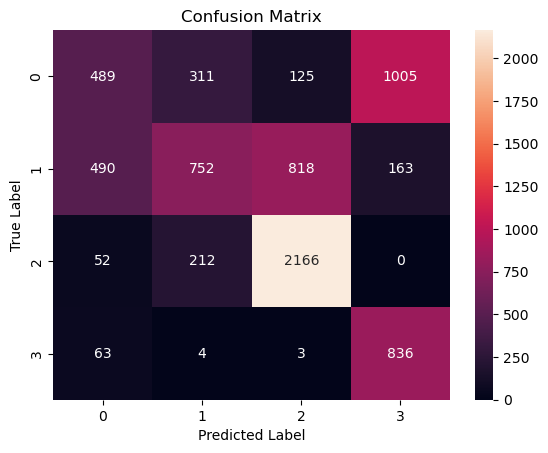

In [69]:
# Step 4: Visualize the confusion matrix for the model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Logistic Regression Model

In [70]:
lg_model = LogisticRegression(max_iter=200)
lg_model.fit(X_train, y_train)

C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [71]:
y_pred_lg = lg_model.predict(X_test)

y_test_lg = label_encoder.inverse_transform(y_test)
y_pred_lg = label_encoder.inverse_transform(y_pred_lg)

In [72]:
print(classification_report(y_test_lg, y_pred_lg))

              precision    recall  f1-score   support

     100-150       0.73      0.74      0.74      1930
     150-200       0.74      0.76      0.75      2223
     200-250       0.89      0.89      0.89      2430
      50-100       0.79      0.73      0.76       906

    accuracy                           0.79      7489
   macro avg       0.79      0.78      0.78      7489
weighted avg       0.79      0.79      0.79      7489



#### SVM model

In [73]:
svc_model = SVC(kernel='rbf', C=0.5, gamma='auto', degree=2)
svc_model.fit(X_train, y_train)

svc_model.score(X_test, y_test)

# Step 3: Make predictions on the test set
y_pred = svc_model.predict(X_test)

y_test_svc = label_encoder.inverse_transform(y_test)
y_pred_svc = label_encoder.inverse_transform(y_pred)

print(classification_report(y_test_svc, y_pred_svc))


              precision    recall  f1-score   support

     100-150       0.78      0.81      0.80      1930
     150-200       0.79      0.82      0.80      2223
     200-250       0.92      0.91      0.91      2430
      50-100       0.86      0.75      0.80       906

    accuracy                           0.84      7489
   macro avg       0.84      0.82      0.83      7489
weighted avg       0.84      0.84      0.84      7489



#### Random Forest model

In [74]:
rf_params = {
    'criterion': 'entropy',
    'max_depth': 15,
    'min_samples_split': 5,
    'min_samples_leaf': 3,
    'max_features': 'log2',
    'bootstrap': False,
    'n_estimators': 50
}
rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(X_train, y_train)

# Step 2: Make predictions on the test set using the trained model
y_pred = rf_model.predict(X_test)

y_test_rf = label_encoder.inverse_transform(y_test)
y_pred_rf = label_encoder.inverse_transform(y_pred)

# Step 3: Evaluate the model using a classification report and print the report
report_rf_custom = classification_report(y_test_rf, y_pred_rf)
print("Random Forest Classification Report with Custom Parameters:")
print(report_rf_custom)

Random Forest Classification Report with Custom Parameters:
              precision    recall  f1-score   support

     100-150       0.89      0.86      0.87      1930
     150-200       0.84      0.88      0.86      2223
     200-250       0.94      0.93      0.93      2430
      50-100       0.91      0.88      0.90       906

    accuracy                           0.89      7489
   macro avg       0.89      0.89      0.89      7489
weighted avg       0.89      0.89      0.89      7489



#### XGBoost model

In [75]:
xgb_model = XGBClassifier(n_estimators=300,        # Number of boosting rounds (trees)
    max_depth=6,              # Depth of the tree
    learning_rate=0.07,      # Lower learning rate (larger n_estimators)
    #colsample_bytree=0.8,    # Fraction of features for each tree
    subsample=0.8,           # Fraction of data for each tree
    gamma=0,                 # No pruning (optional, can try higher values)
    reg_alpha=0.1,           # L1 regularization
    reg_lambda=1,            # L2 regularization
    tree_method='hist',      # Faster method for large datasets
    n_jobs=-1 
)
xgb_model.fit(X_train, y_train)

# Step 2: Evaluate the model's performance using accuracy score and print it
y_pred = xgb_model.predict(X_test)

y_test_xgb = label_encoder.inverse_transform(y_test)
y_pred_xgb = label_encoder.inverse_transform(y_pred)

print(classification_report(y_test_xgb, y_pred_xgb))

              precision    recall  f1-score   support

     100-150       0.92      0.90      0.91      1930
     150-200       0.90      0.92      0.91      2223
     200-250       0.96      0.95      0.96      2430
      50-100       0.92      0.92      0.92       906

    accuracy                           0.93      7489
   macro avg       0.92      0.92      0.92      7489
weighted avg       0.93      0.93      0.93      7489



#### Light GBM 

In [76]:
lgbm_model = LGBMClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, colsample_bytree=0.5)
lgbm_model.fit(X_train, y_train)

# Step 2: Make predictions on the test data
y_pred = lgbm_model.predict(X_test)

# Step 3: Inverse transform the predictions and the true values for classification report
y_test_lgbm = label_encoder.inverse_transform(y_test)
y_pred_lgbm = label_encoder.inverse_transform(y_pred)

# Step 4: Print the classification report
print(classification_report(y_test_lgbm, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 83
[LightGBM] [Info] Number of data points in the train set: 22467, number of used features: 25
[LightGBM] [Info] Start training from score -1.343386
[LightGBM] [Info] Start training from score -1.228925
[LightGBM] [Info] Start training from score -1.126779
[LightGBM] [Info] Start training from score -2.100810
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [77]:
if mlflow.active_run():
    mlflow.end_run()

In [78]:
import os
import mlflow

# Set DagsHub Authentication (replace with your actual username and token)
os.environ['MLFLOW_TRACKING_USERNAME'] = 'AkshadaBauskar'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '939fe0835287d11985e6e0f241e5412185e320b6'

In [79]:
mlflow.set_tracking_uri("https://dagshub.com/AkshadaBauskar/Beverage_Price_Prediction.mlflow")

# Confirm the tracking URI
print("Tracking URI:", mlflow.get_tracking_uri())
mlflow.set_experiment('Beverage_Price_Prediction')

# Define models
models = {
    "Gaussian Naive Bayes" : nb_model,
    "Logistic Regression" : lg_model,
    "Support Vector Classifier": svc_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Light GBM" : lgbm_model
}

# Train and log models
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        # Train the model
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Evaluate the model
        acc = accuracy_score(y_test, predictions)

        # Log model and metrics
        mlflow.sklearn.log_model(model, model_name)
        mlflow.log_metric("accuracy", acc)
        mlflow.log_param("model_type", model_name)

        print(f"{model_name} logged with accuracy: {acc:.4f}")

    # End run after each model
    mlflow.end_run()

Tracking URI: https://dagshub.com/AkshadaBauskar/Beverage_Price_Prediction.mlflow


2025/01/14 14:45:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Gaussian Naive Bayes logged with accuracy: 0.5666
🏃 View run Gaussian Naive Bayes at: https://dagshub.com/AkshadaBauskar/Beverage_Price_Prediction.mlflow/#/experiments/0/runs/ab5069e1924c4c5ea8dd8610ffde6050
🧪 View experiment at: https://dagshub.com/AkshadaBauskar/Beverage_Price_Prediction.mlflow/#/experiments/0


C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/01/14 14:46:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logistic Regression logged with accuracy: 0.7928
🏃 View run Logistic Regression at: https://dagshub.com/AkshadaBauskar/Beverage_Price_Prediction.mlflow/#/experiments/0/runs/5fabcae80cef4c02a30f638c99bbfede
🧪 View experiment at: https://dagshub.com/AkshadaBauskar/Beverage_Price_Prediction.mlflow/#/experiments/0


2025/01/14 14:46:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Support Vector Classifier logged with accuracy: 0.8358
🏃 View run Support Vector Classifier at: https://dagshub.com/AkshadaBauskar/Beverage_Price_Prediction.mlflow/#/experiments/0/runs/b0655879f2a448378f376d9511159643
🧪 View experiment at: https://dagshub.com/AkshadaBauskar/Beverage_Price_Prediction.mlflow/#/experiments/0


2025/01/14 14:47:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest logged with accuracy: 0.8928
🏃 View run Random Forest at: https://dagshub.com/AkshadaBauskar/Beverage_Price_Prediction.mlflow/#/experiments/0/runs/dbc7dbef9b5948bcbee7487a34c64a05
🧪 View experiment at: https://dagshub.com/AkshadaBauskar/Beverage_Price_Prediction.mlflow/#/experiments/0


2025/01/14 14:47:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost logged with accuracy: 0.9254
🏃 View run XGBoost at: https://dagshub.com/AkshadaBauskar/Beverage_Price_Prediction.mlflow/#/experiments/0/runs/b5b4d0480c0f48abb83623071e192ad3
🧪 View experiment at: https://dagshub.com/AkshadaBauskar/Beverage_Price_Prediction.mlflow/#/experiments/0
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 83
[LightGBM] [Info] Number of data points in the train set: 22467, number of used features: 25
[LightGBM] [Info] Start training from score -1.343386
[LightGBM] [Info] Start training from score -1.228925
[LightGBM] [Info] Start training from score -1.126779
[LightGBM] [Info] Start training from score -2.100810
[LightGBM] [Warning] No further splits with positive gain, best g

2025/01/14 14:47:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Light GBM logged with accuracy: 0.9076
🏃 View run Light GBM at: https://dagshub.com/AkshadaBauskar/Beverage_Price_Prediction.mlflow/#/experiments/0/runs/7aaccb075232459fbe8f3739fb30aef4
🧪 View experiment at: https://dagshub.com/AkshadaBauskar/Beverage_Price_Prediction.mlflow/#/experiments/0


In [80]:
from mlflow.tracking import MlflowClient

# Initialize MLflow client
client = MlflowClient()

# Get experiment details
experiment_name = "Beverage_Price_Prediction"
experiment = client.get_experiment_by_name(experiment_name)

# Fetch all runs for the experiment
runs = client.search_runs(experiment_ids=experiment.experiment_id)

# Display run metrics for comparison
for run in runs:
    print(f"Run ID: {run.info.run_id}, Accuracy: {run.data.metrics.get('accuracy')}")


Run ID: 7aaccb075232459fbe8f3739fb30aef4, Accuracy: 0.9075978101215115
Run ID: b5b4d0480c0f48abb83623071e192ad3, Accuracy: 0.9253571905461343
Run ID: dbc7dbef9b5948bcbee7487a34c64a05, Accuracy: 0.8927760715716384
Run ID: b0655879f2a448378f376d9511159643, Accuracy: 0.8357591133662705
Run ID: 5fabcae80cef4c02a30f638c99bbfede, Accuracy: 0.7927627186540259
Run ID: ab5069e1924c4c5ea8dd8610ffde6050, Accuracy: 0.5665642942983041
Run ID: a8df12ace30147d7bc27e3cdc6485ba8, Accuracy: 0.9075978101215115
Run ID: 6c8112d716404bdabd342332be7a3525, Accuracy: 0.9253571905461343
Run ID: 4df844e8b7e2447587c3d28c6a253e63, Accuracy: 0.8925090132193885
Run ID: ec47fd6005d148668a56a759021bcb1e, Accuracy: 0.8357591133662705
Run ID: 7d9ecd57d9714f3d9c68d33dbfe01ff0, Accuracy: 0.7927627186540259
Run ID: ecfdb23e7e5049e1874f2a3f8999b613, Accuracy: 0.5665642942983041


In [81]:
# Find the run with the highest accuracy
best_run = max(runs, key=lambda run: run.data.metrics["accuracy"])

print(f"Best Model Run ID: {best_run.info.run_id}")
print(f"Best Accuracy: {best_run.data.metrics['accuracy']}")


Best Model Run ID: b5b4d0480c0f48abb83623071e192ad3
Best Accuracy: 0.9253571905461343


In [82]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
run_id = best_run.info.run_id

# List all artifacts in the run
artifacts = client.list_artifacts(run_id)
for artifact in artifacts:
    print("Artifact path:", artifact.path)

Artifact path: XGBoost


In [83]:
import mlflow.sklearn

# Corrected path to load the XGBoost model
best_model = mlflow.sklearn.load_model(f"runs:/{best_run.info.run_id}/XGBoost")

print("Best model loaded successfully!")


Best model loaded successfully!


In [84]:
import joblib

# Save the loaded model for deployment
joblib.dump(best_model, "best_model.pkl")
print("Model saved as 'best_model.pkl'")

Model saved as 'best_model.pkl'
